In [179]:
#importing the required packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [180]:
#importing the train data and viewing the first few rows
train = pd.read_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Titanic Data/final/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
#viewing the details of the train data
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
#we notice that the columns "Age" , "Cabin", and "Embarked" have missing values.

In [182]:
#importing the test data and viewing the first few rows
test = pd.read_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Titanic Data/final/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [183]:
#viewing the details of the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#we notice that the columns "Age" , "Cabin", and "Fare" have missing values. 
#Also the test data does not have the "Survived" column, so we have to add the "survived" to the test.

In [ ]:
#since we have missing values in both the datasets , we will merge them so that 
#we can performe imputations on them and handle the missing values.

In [184]:
#combinig the test and train data
frames = [train,test]
total_data = pd.concat(frames)

In [185]:
total_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [186]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
#some visualizations

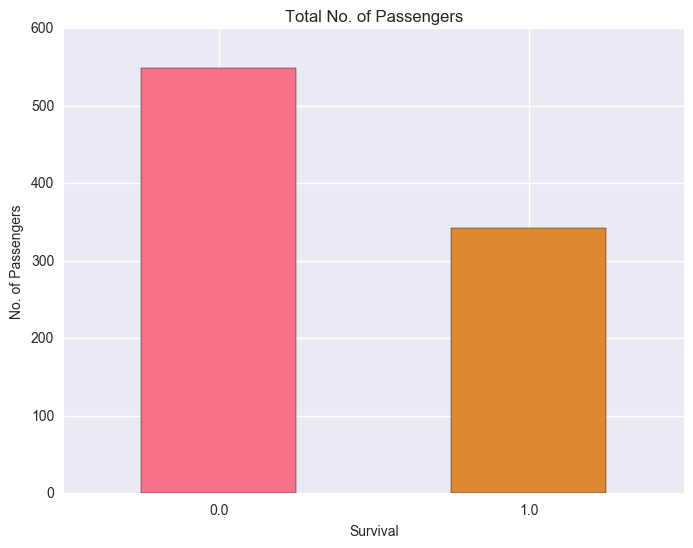

In [187]:
#visualizing the total number of passengers survived
colors=sns.color_palette("husl", 10) 
pd.Series(total_data["Survived"]).value_counts().plot(kind = "bar",
                        color=colors,figsize=(8,6),fontsize=10,rot = 0, title = "Total No. of Passengers")
plt.xlabel('Survival', fontsize=10)
plt.ylabel('No. of Passengers', fontsize=10)

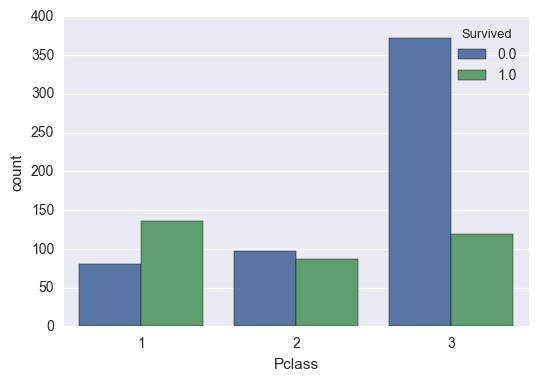

In [188]:
#visualizing the number of passengers survived per pclass
sns.countplot(total_data['Pclass'], hue=total_data['Survived'])

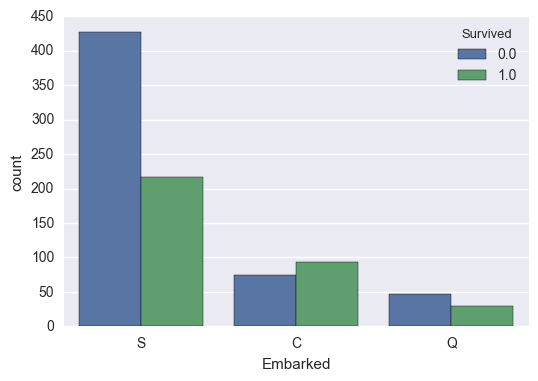

In [189]:
#visualizing the number of passengers survived per Embarked locations
sns.countplot(total_data['Embarked'], hue=total_data['Survived'])

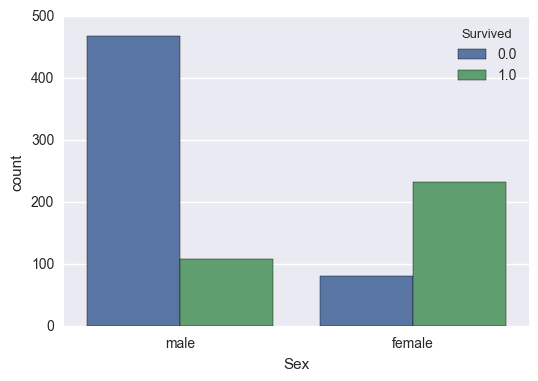

In [190]:
#visualizing the number of passengers survived per Gender
sns.countplot(total_data['Sex'], hue=total_data['Survived'])

In [ ]:
#Imputing the missing values

In [191]:
#first we will handle the "PassengerId" column. It is not required in our data for imputations , so we can drop it.
total_data = total_data.drop("PassengerId", axis=1)
total_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [192]:
#we will handle the "Cabin" column. It has the maximum missing values. IT seems quite statistically insignificant.
#Hence we should drop that column from our dataset.
total_data = total_data.drop("Cabin", axis=1)
total_data.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [193]:
#To check which rows have null Embarked column
total_data[total_data['Embarked'].isnull()]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1.0,113572
829,62.0,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572


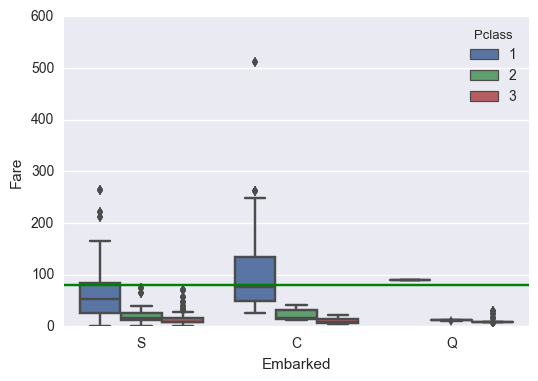

In [194]:
#visualizing the passengers embarked and fare based on the pclass
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data= total_data)
plt.axhline(y=80, color='green')

In [ ]:
#we see that most people who had pclass 1 and fare 80 would embark at C, hence fill the null values with C.

In [195]:
total_data['Embarked'].fillna('C', inplace=True)

In [196]:
#To check which rows have null Fare column
total_data[total_data['Fare'].isnull()]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701


In [ ]:
#since that passanger is of pclass 3, and embarked from S, we will fill the missing 
#value with the most common value of fare with this combination.

In [197]:
total_data[(total_data.Pclass==3)&(total_data.Embarked=='S')].Fare.value_counts().head()

8.0500    60
7.8958    43
7.7750    26
7.9250    23
7.8542    21
Name: Fare, dtype: int64

In [199]:
total_data['Fare'].fillna('8.0500', inplace=True)

In [200]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
Age         1046 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null object
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [201]:
#creating a new column "Title" from "Name"

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

total_data['Title'] = total_data['Name'].apply(get_title)

total_data['Title'] = total_data['Title'].replace(['Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev','Jonkheer', 'Dona'], 'Rare')

total_data['Title'] = total_data['Title'].replace('Mlle', 'Miss')
total_data['Title'] = total_data['Title'].replace('Ms', 'Miss')
total_data['Title'] = total_data['Title'].replace('Mme', 'Mrs')
total_data['Title'] = total_data['Title'].replace('Lady', 'Mrs')
total_data['Title'] = total_data['Title'].replace('Sir', 'Mr')

In [202]:
total_data.Title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [203]:
#changing the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex','Ticket','Title']
for col in cat_vars:
    total_data[col]=labelEnc.fit_transform(total_data[col])

total_data.head()
    
    

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,2,7.25,"Braund, Mr. Owen Harris",0,3,1,1,0.0,720,2
1,38.0,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,1.0,816,3
2,26.0,2,7.925,"Heikkinen, Miss. Laina",0,3,0,0,1.0,914,1
3,35.0,2,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,1,1.0,65,3
4,35.0,2,8.05,"Allen, Mr. William Henry",0,3,1,0,0.0,649,2


In [209]:
#Also we see that PassengerId ,Parch and SibSp columns can be combined into a single column
#hence combining the PassengerId ,Parch and SibSp into one column as "FamSize"
total_data['FamSize'] = total_data['Parch'] + total_data['SibSp'] +1

In [ ]:
#now we have to fill the missing values in "Age" column.
#There are many missing values in age so instead of simply 
#replacing it with mean/median/mode we will try to predict the missing values with a classifier.


In [204]:
from sklearn.ensemble import RandomForestRegressor
#predicting missing values in age using Random Forest
def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare','Title', 'FamSize',
                 'Ticket','Pclass']]
    # Split sets into train and test
    train_age  = age_df.loc[ (df.Age.notnull()) ]# known Age values
    test_age = age_df.loc[ (df.Age.isnull()) ]# null Ages
    
    # All age values are stored in a target array
    y = train_age.values[:, 0]
    
    # All the other values are stored in the feature array
    X = train_age.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test_age.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

total_data=fill_missing_age(total_data)

In [205]:
#The "ticket" column also seems quite statistically insignificant , hence remove that as well.
total_data = total_data.drop("Ticket", axis=1)
total_data.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Title
0,22.0,2,7.25,"Braund, Mr. Owen Harris",0,3,1,1,0.0,2
1,38.0,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,1.0,3
2,26.0,2,7.925,"Heikkinen, Miss. Laina",0,3,0,0,1.0,1
3,35.0,2,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,1,1.0,3
4,35.0,2,8.05,"Allen, Mr. William Henry",0,3,1,0,0.0,2


In [206]:
#The "Name" column also seems quite statistically insignificant , hence remove that as well.
total_data = total_data.drop("Name", axis=1)
total_data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
0,22.0,2,7.25,0,3,1,1,0.0,2
1,38.0,0,71.2833,0,1,0,1,1.0,3
2,26.0,2,7.925,0,3,0,0,1.0,1
3,35.0,2,53.1,0,1,0,1,1.0,3
4,35.0,2,8.05,0,3,1,0,0.0,2


In [207]:
total_data.tail()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title
413,34.983500,2,8.05,0,3,1,0,NaN,2
414,39.000000,0,108.9,0,1,0,0,NaN,4
415,38.500000,2,7.25,0,3,1,0,NaN,2
416,32.674500,2,8.05,0,3,1,0,NaN,2
417,4.045468,0,22.3583,1,3,1,1,NaN,0


In [210]:
#creating the train and test features and labels
train_labels = train.Survived
train_features = total_data.ix[:890]
train_features = train_features.drop(['Survived'],axis=1)
test_features = total_data.iloc[891:1309,:]
test_features = test_features.drop(['Survived'],axis=1)

In [212]:
#Feature Scaling

## scale the train data

scaler1 = StandardScaler().fit(train_features)
train_features = scaler1.transform(train_features)

## scale the test data
scaler2 = StandardScaler().fit(test_features)
test_features = scaler2.transform(test_features)

## Normalize the train labels using LabelEncoder
encoder= preprocessing.LabelEncoder()
train_labels = encoder.fit_transform(train_labels)


In [ ]:
#Running the classifiers

In [219]:

##using random forest classifier 
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)
clffit = clf.fit(train_features,train_labels)
pred= clf.predict(test_features)
print(clffit.score(train_features,train_labels))

#importing the predicted values into excel file in two columns "PassengerId" and "Survived" 
final= pd.DataFrame()
final['PassengerId']= test.PassengerId
final['Survived']= pred

#submitting the predicted values in a csv file
final.to_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Titanic Data/final/result/result_rf6.csv",index=False)



0.850729517396


In [ ]:
#using XGBoost classifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

gbm = xgb.XGBClassifier(
 learning_rate = 0.02,
 n_estimators= 2000, 
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,               
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)

gbmfit = gbm.fit(train_features,train_labels)
pred= gbm.predict(test_features)
print(gbmfit.score(train_features,train_labels))

#importing the predicted values into excel file in two columns "PassengerId" and "Survived" 
final= pd.DataFrame()
final['PassengerId']= test.PassengerId
final['Survived']= pred

#submitting the predicted values in a csv file
final.to_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Titanic Data/final/result/result_xgb1.csv",index=False)

In [217]:
#using XGBoost classifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

gbm = xgb.XGBClassifier(
 learning_rate = 0.02,
 n_estimators= 2000, 
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,               
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)

gbmfit = gbm.fit(train_features,train_labels)
pred= gbm.predict(test_features)
print(gbmfit.score(train_features,train_labels))

#importing the predicted values into excel file in two columns "PassengerId" and "Survived" 
final= pd.DataFrame()
final['PassengerId']= test.PassengerId
final['Survived']= pred

#submitting the predicted values in a csv file
final.to_csv("C:/Users/Rashmita Rout/Desktop/Multivariate/Titanic Data/final/result/result_xgb1.csv",index=False)



ImportError: cannot import name 'XGBClassifier'